# Optimal exposure time

In a single frame, the variance of the noise is the sum of the variances of the read noise σ_r and of the signal. Since the signal has Poisson statistics, its variance is t * (I + N), with t the exposure time and I and N respectively the photon and thermal signals, in electrons per second. When stacking (summing) n frames, the noises add quadratically and the variance in the resulting image is thus given by

σ² = n * [ t * (I + N) + σ_r² ]

We decompose the photon signal I as the sum of the signal A from the astronomical object of interest and of the sky background brightness K, and rewrite the above as

σ² = n * t * A + n * [ t * (K + N) + σ_r² ]

The first term is the variance from the shot noise of the astronomical object, which depends only upon the total exposure time n * t. For that term, there is no difference between a single long exposure and several shorter ones.

The last two terms are the variance of the noises from the parasitic sources: read noise, sky background and thermal signal. With a cooled camera, the thermal noise can easily be negligible before the sky background. The ratio

R = ( σ_r² + t * K ) / ( t * K )

represents the noise relative to the ideal detector case (no read noise, no thermal noise). Interestingly, it does not depend upon the number of exposures. We can then define a maximum acceptable value for this ratio, so that

R < (1 + ε)²

with ε representing the acceptable increase in noise, e.g. 0.1 for 10%. We then derive the corresponding exposure time

t = σ_r² / { K * [ (1 + ε)² - 1] }

Exposure times larger than that will only provide marginal reduction of the noise in the stack.

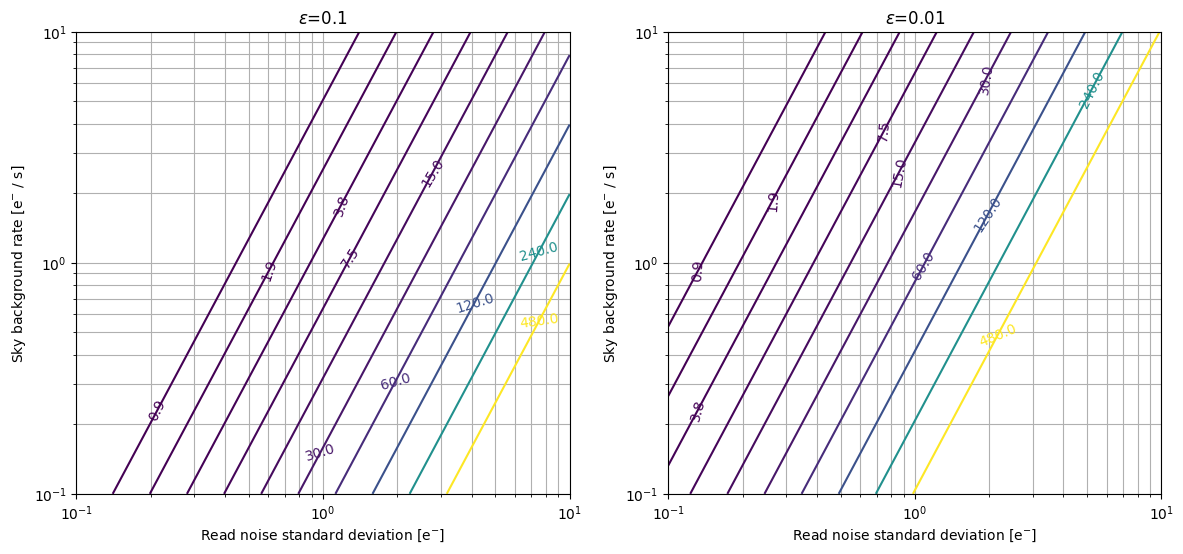

In [58]:
import numpy as np
import matplotlib.pyplot as plt


def optimal_exposure(sigma_rn, sk, eps):
    """
    Implements the above formula for optimal exposure time
    :param sigma_rn: standard deviation of the read noise [electrons]
    :param sk: sky background brightness rate [electrons / second]
    :param eps: acceptable noise increase (e.g. 0.01 = 1%)
    :return: optimal exposure time [seconds]
    """
    return sigma_rn ** 2 / ( sk * ( ( 1 + eps ) ** 2 - 1) )

epsilon = [0.1, 0.01]

read_noise_values = 10 ** np.linspace(-1, 1, 100)  # regular sampling in log
sky_background_values = 10 ** np.linspace(-1, 1, 100)
read_noise_grid, sky_background_grid = np.meshgrid(read_noise_values, sky_background_values)  # grid of values at the sampling values defined above

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for e, ax in zip(epsilon, axes.flatten()):
    c = ax.contour(read_noise_grid,
                   sky_background_grid,
                   optimal_exposure(read_noise_grid, sky_background_grid, e),
                   levels=[0.9375, 1.875, 3.75, 7.5, 15, 30, 60, 120, 240, 480])
    ax.clabel(c, c.levels, inline=False)
    ax.set_xlabel('Read noise standard deviation [e$^{-}$]')
    ax.set_ylabel('Sky background rate [e$^{-}$ / s]')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid('on', which='major')
    ax.grid('on', which='minor')
    ax.set_title(f'$\epsilon$={e}')

For a given ε, the optimum exposure time is proportional to the ratio σ_r² / K. The higher the read noise, the longer the required exposure time. The brighter the sky background, the shorter the required exposure time. For example, for a read noise of 1.4 electrons and a sky brightness of 0.35 electrons, one gets

In [57]:
t = optimal_exposure(1.4, 0.35, 0.1)
print(f'{t:0.1f} s')

26.7 s


for ε = 0.1 (10% acceptable noise increase), and


In [59]:
t = optimal_exposure(1.4, 0.35, 0.01)
print(f'{t:0.1f} s')

278.6 s


for ε = 0.01 (1% acceptable noise increase). These values are to be compared with the maximum exposure time allowed by the tracking system (see [1.3.3](README.md#13-notes)).